In [1]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import json
base_dir = os.path.dirname(os.getcwd())
print(base_dir)
sys.path.insert(1, base_dir)
from package.api import DB as api
import package.utils as utils
# import package.tuning as tuning
# utils.check_gpu()

# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split

# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers, regularizers, optimizers, metrics
# #import tensorflow_addons as tfa

# import keras_tuner as kt

# from kerastuner_tensorboard_logger import (
#     TensorBoardLogger,
#     setup_tb  # Optional
# )


%matplotlib inline
%load_ext autoreload
%autoreload 2


paths_df = pd.read_csv(base_dir + '/paths.csv')
paths_df['path'] = base_dir + '/' + paths_df['path']

Fc = 2
dataset = 'DS08'

log_location = base_dir + '/logs'
model_location = base_dir + '/models'
data_location = base_dir + '/data'
Fc = 2
dataset = 'DS08'
data_header = f'Fc-{Fc}_dataset-{dataset}'


/home/macslab/phm2021_data_challenge


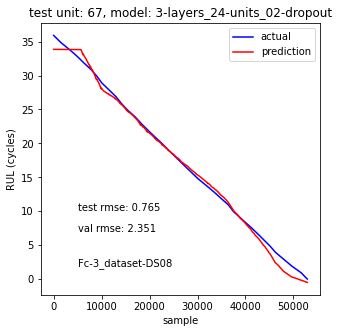

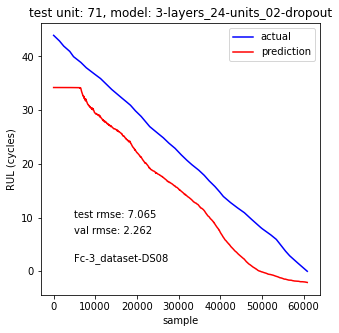

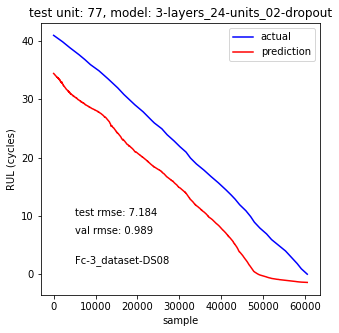

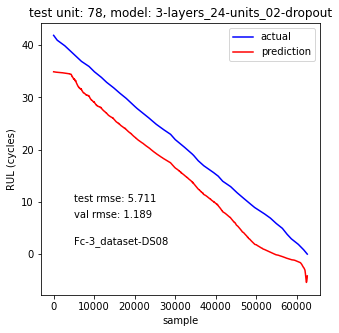

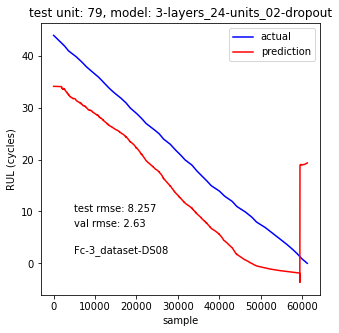

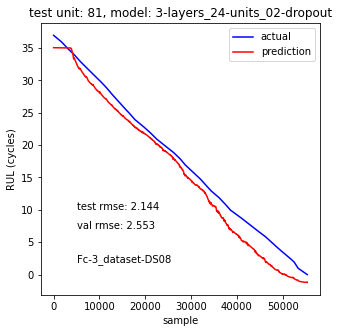

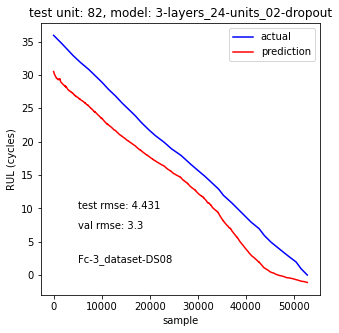

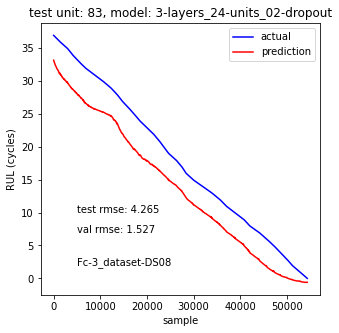

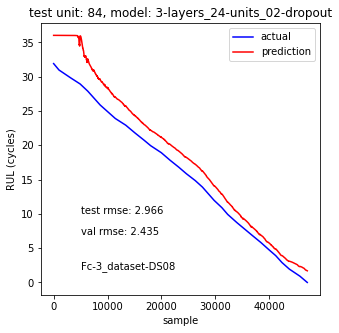

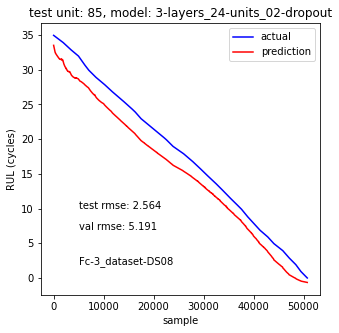

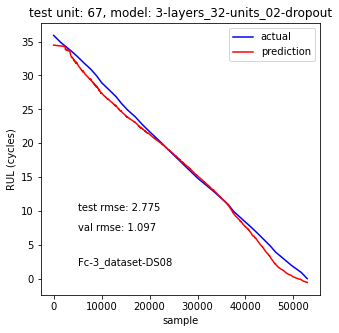

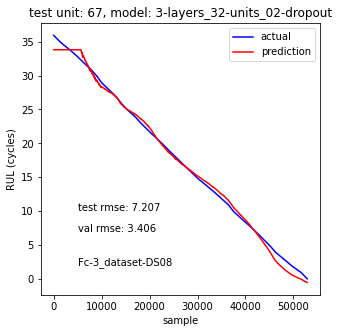

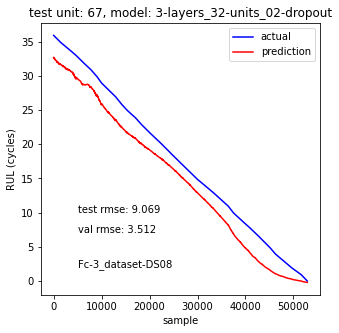

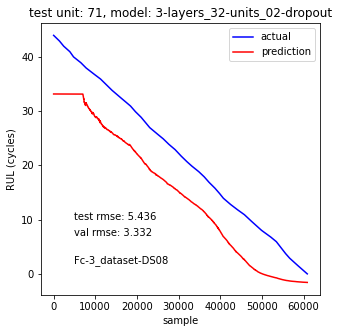

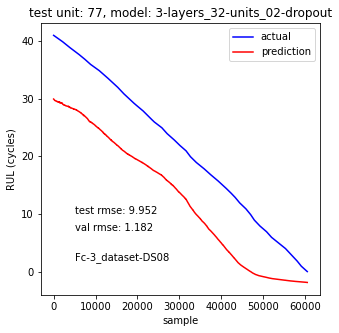

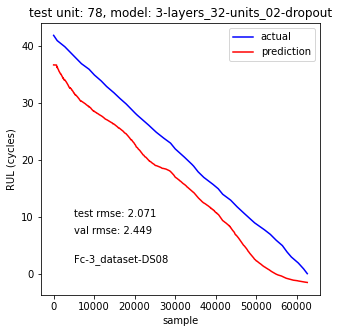

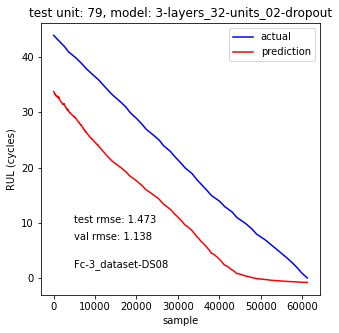

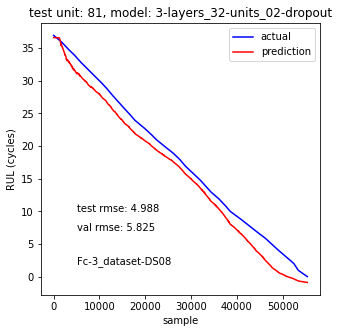

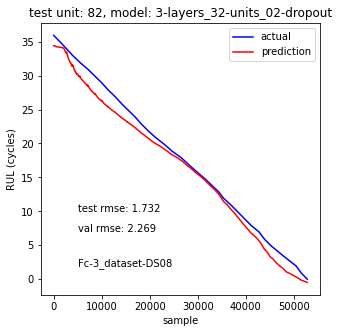

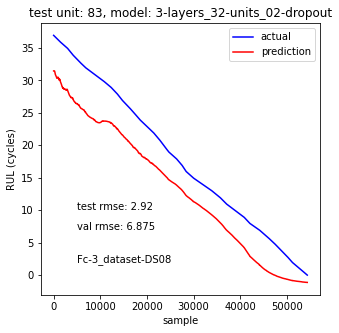

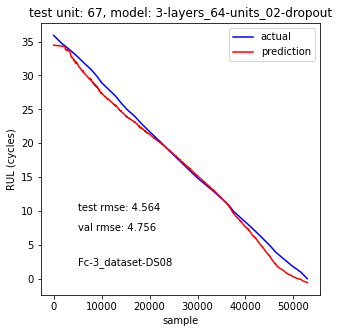

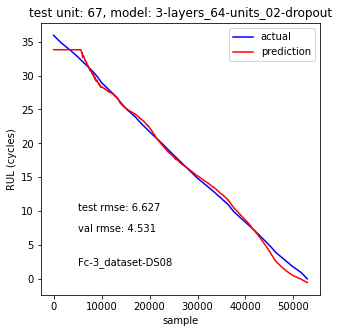

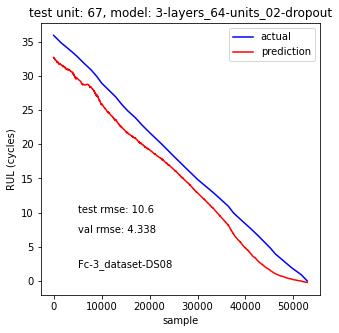

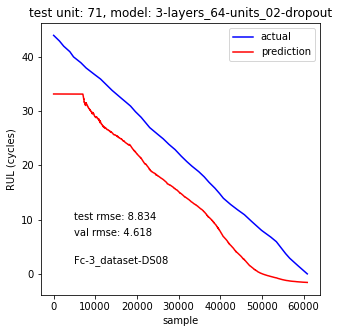

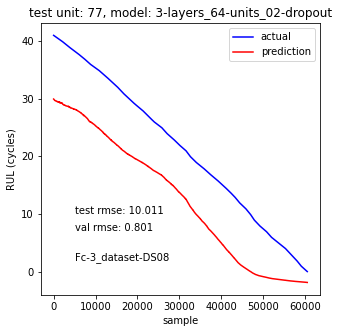

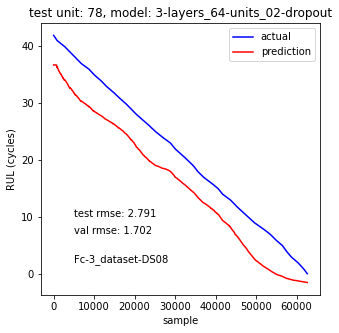

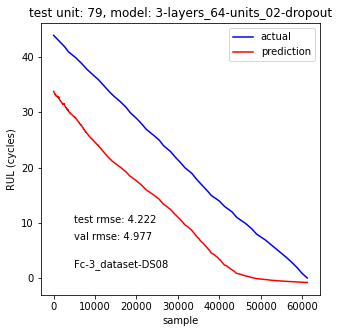

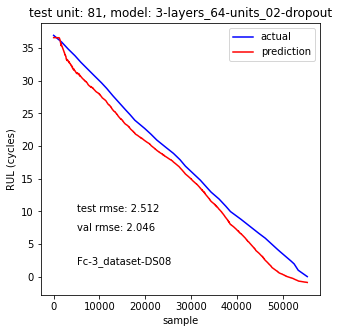

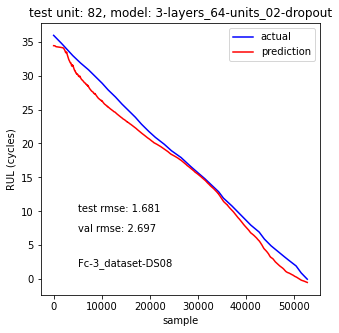

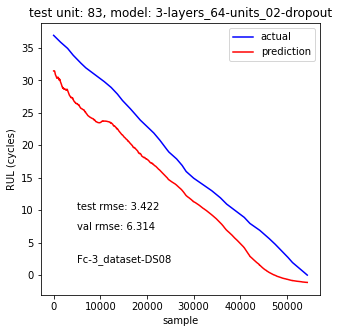

In [2]:
Fc = 3
dataset = 'DS08'
data_header = f'Fc-{Fc}_dataset-{dataset}'
files = []
for i in range(3):
    files.append(utils.load_json(log_location, data_header, f'_{i}.json'))

utils.plot_rul_results(files, data_header)

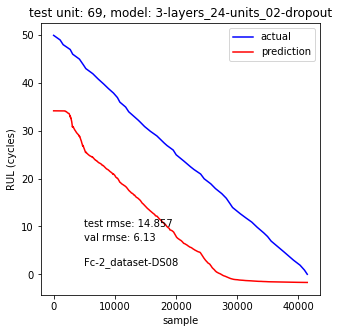

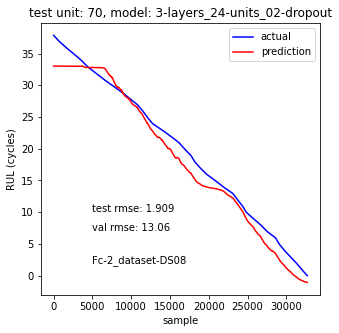

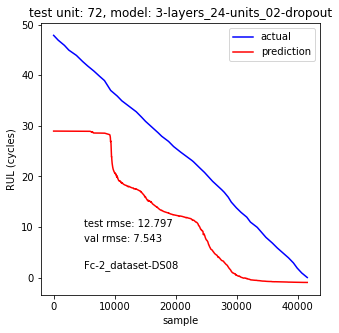

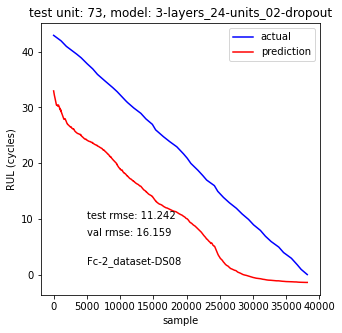

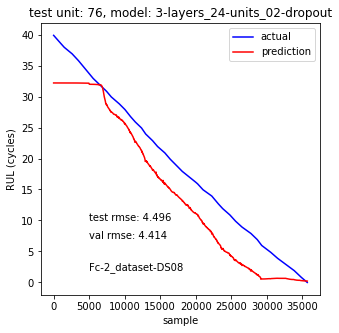

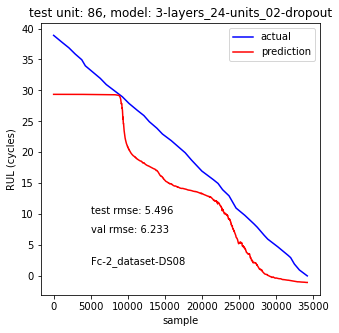

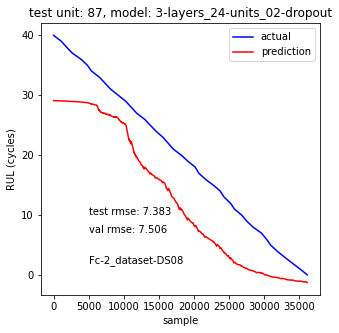

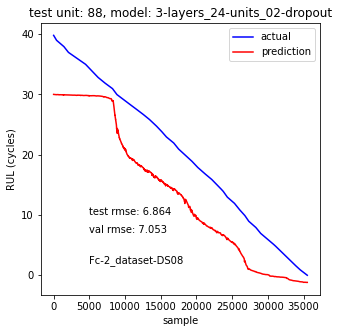

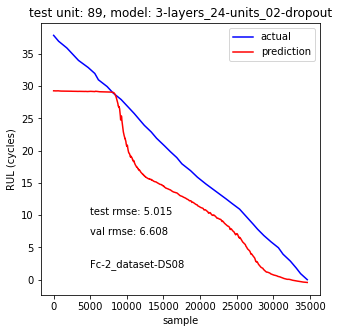

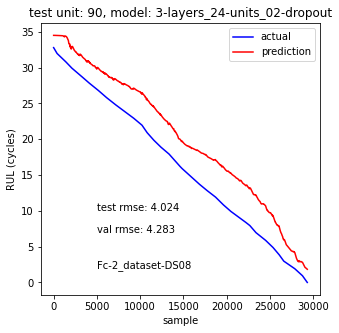

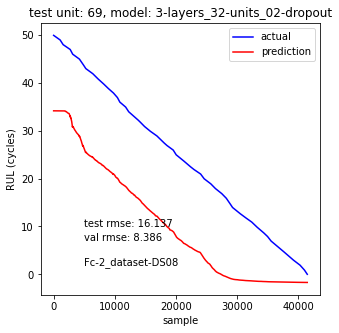

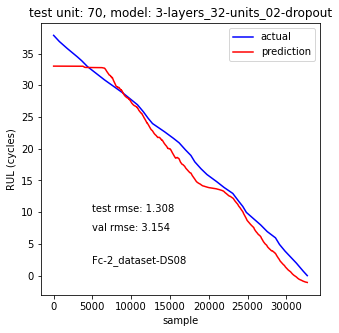

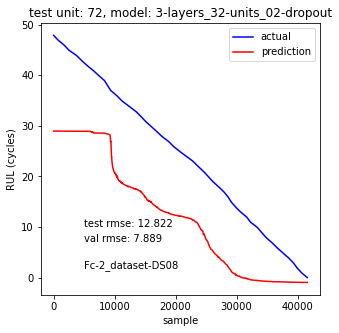

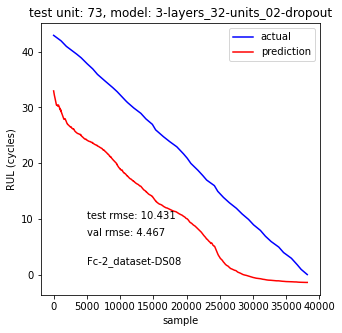

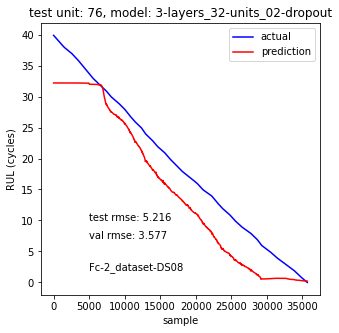

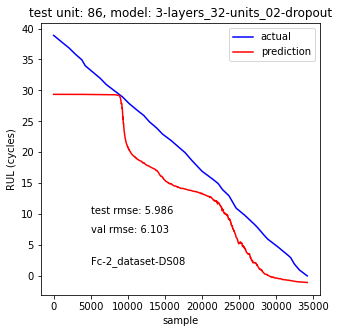

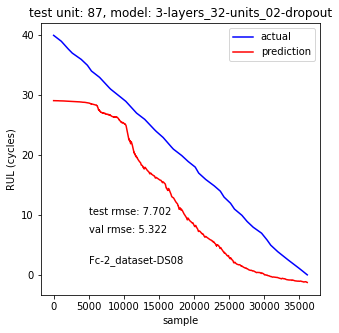

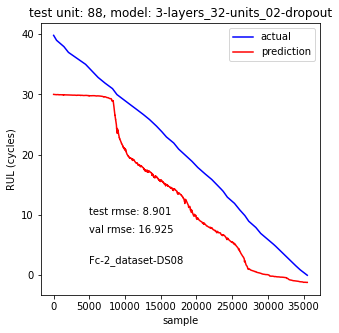

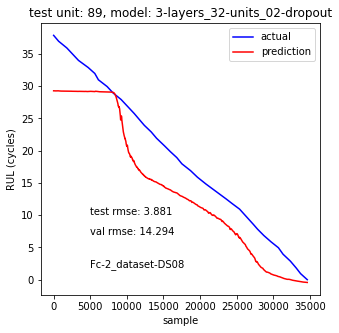

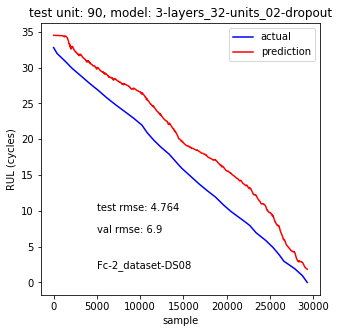

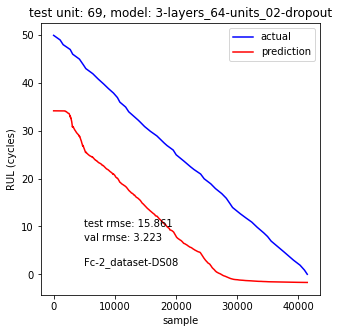

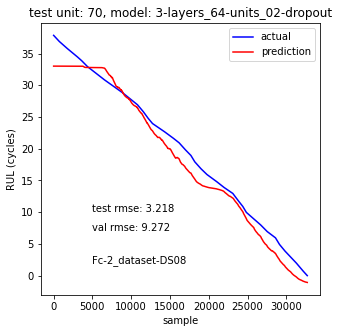

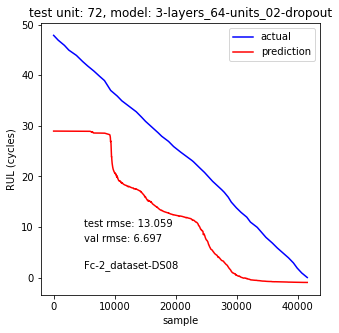

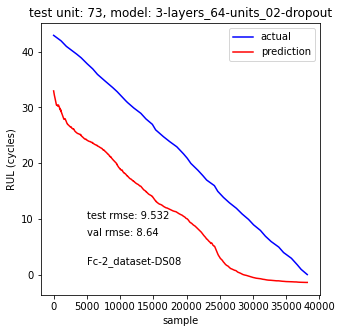

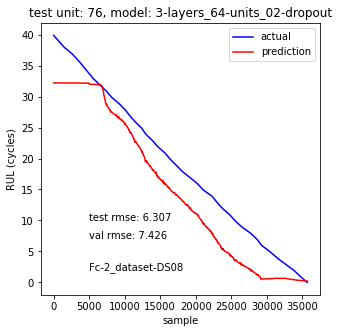

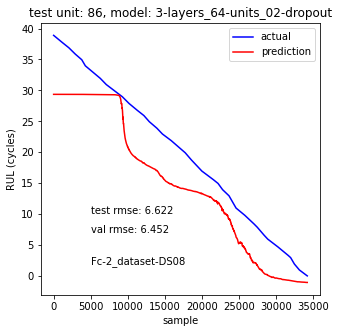

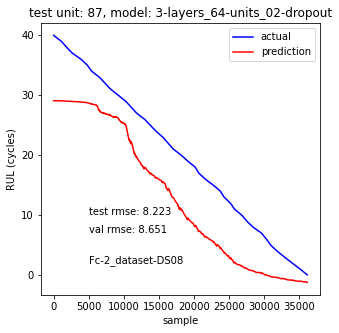

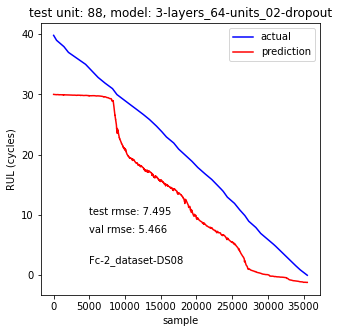

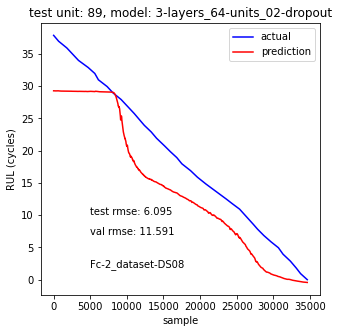

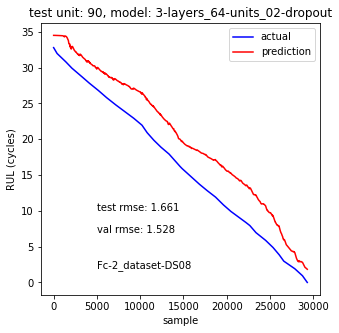

In [131]:
Fc = 2
dataset = 'DS08'
data_header = f'Fc-{Fc}_dataset-{dataset}'
files = []
for i in range(3):
    files.append(utils.load_json(log_location, data_header, f'_{i}.json'))

utils.plot_rul_results(files, data_header)

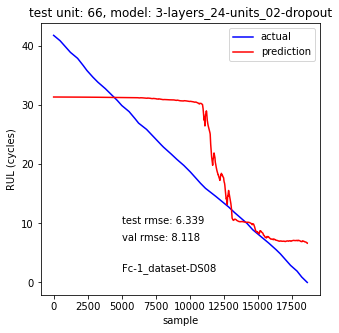

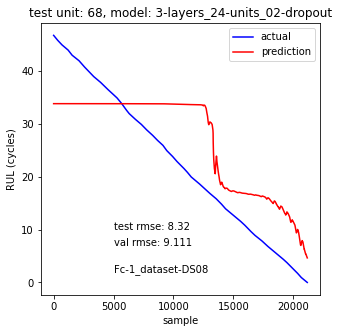

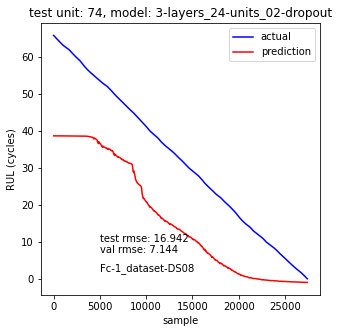

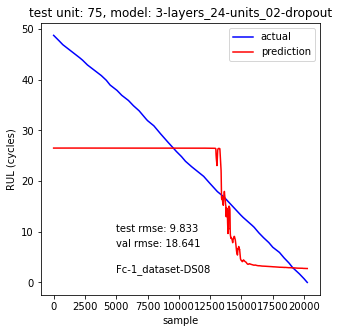

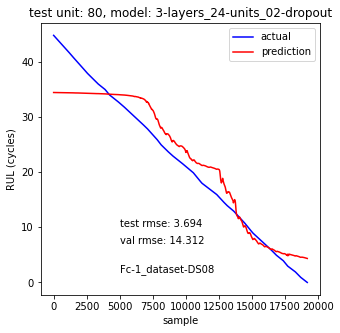

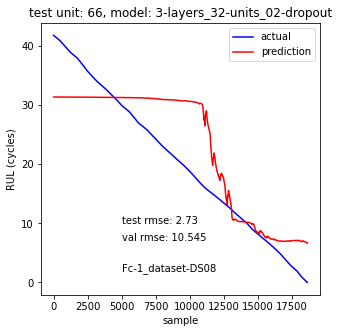

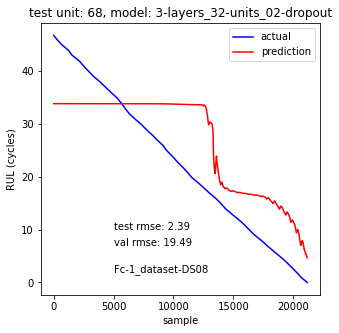

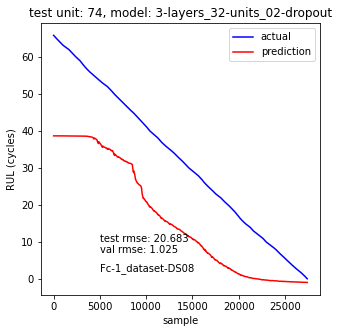

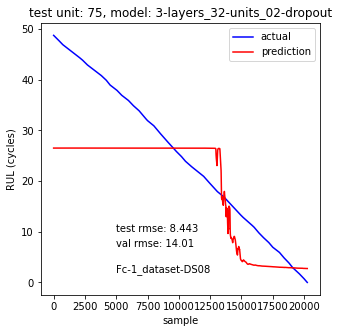

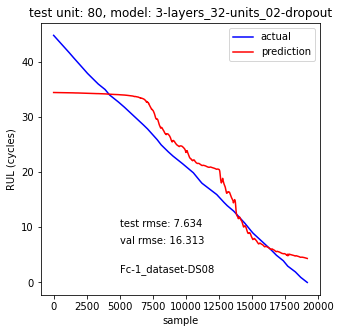

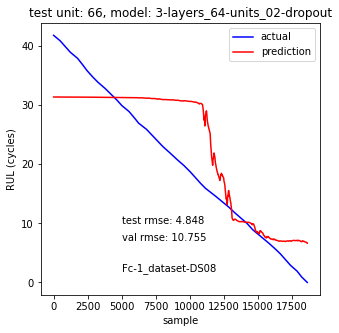

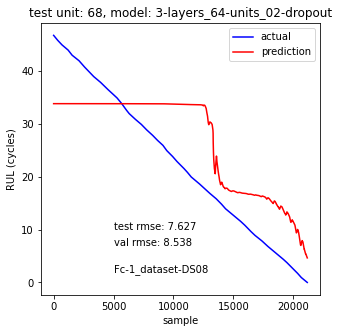

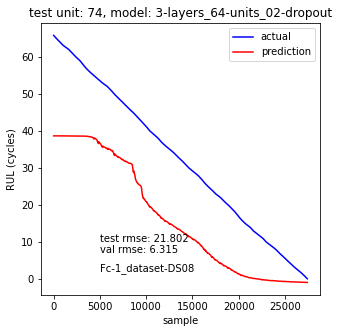

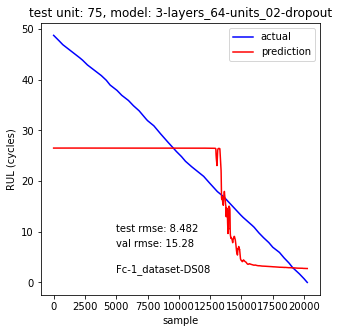

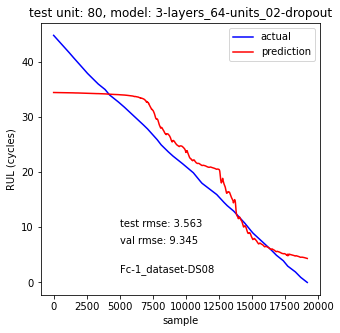

In [132]:
Fc = 1
dataset = 'DS08'
data_header = f'Fc-{Fc}_dataset-{dataset}'
files = []
for i in range(3):
    files.append(utils.load_json(log_location, data_header, f'_{i}.json'))

utils.plot_rul_results(files, data_header)

In [134]:
utils.parse_json(files[i], 'test_rmse', [])

[4.847925662994385,
 7.626649379730225,
 21.802305221557617,
 8.481633186340332,
 3.5630459785461426]

In [144]:
for j in range(1,4):
    Fc = j
    dataset = 'DS08'
    data_header = f'Fc-{Fc}_dataset-{dataset}'
    files = []
    for i in range(3):
        files.append(utils.load_json(log_location, data_header, f'_{i}.json'))

    test_means = []
    test_stds = []
    val_means = []
    val_stds = []
    for i in range(3):
        test_scores = np.array(utils.parse_json(files[i], 'test_rmse', []))
        val_scores = np.array(utils.parse_json(files[i], 'val_rmse', []))
        test_means.append(np.mean(test_scores))
        test_stds.append(np.std(test_scores))
        val_means.append(np.mean(val_scores))
        val_stds.append(np.std(val_scores))

    print(data_header)
    print(test_means)
    print(val_means)
    print(val_stds)
    print('--------------------------')
    if j == 3:
        print(test_scores)
        print(val_scores)


Fc-1_dataset-DS08
[9.02545256614685, 8.37612476348877, 9.26431188583374]
[11.465237426757813, 12.276675033569337, 10.046592521667481]
[4.359292200286252, 6.339298239724474, 2.986128360777565]
--------------------------
Fc-2_dataset-DS08
[7.408022916316986, 7.714678406715393, 7.807307183742523]
[7.898914337158203, 7.701759839057923, 6.894685685634613]
[3.5870550938953656, 4.313326829925955, 2.8050571761141736]
--------------------------
Fc-3_dataset-DS08
[4.535151249170303, 4.762243139743805, 5.526402151584625]
[2.442716807126999, 3.1084311246871947, 3.6779751658439634]
[1.1358360371524396, 1.8613375883366243, 1.6629187673345138]
--------------------------
[ 4.56385279  6.62654495 10.60000229  8.83407116 10.01147461  2.79149747
  4.22151661  2.51235914  1.68098748  3.42171502]
[4.75557899 4.53087425 4.33827448 4.61795712 0.80063903 1.70203233
 4.9768343  2.04628491 2.69706869 6.31420755]


'Fc-1_dataset-DS08'